In [1]:
import numpy as np
from scipy import signal
import seaborn as sns
import scipy.stats as stats
import matplotlib.gridspec as gridspec
from scipy.ndimage.interpolation import shift
import scipy.interpolate as interpolate
from scipy.signal import butter, lfilter, hilbert
from load_intan_rhd_format import load_intan_rhd_format
import itertools as it
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from lab.classes.dbclasses import dbMouse
from lab.analysis import behavior_analysis as ba
from lab.misc.auto_helpers import locate

In [2]:
%run Helper_Functions.ipynb

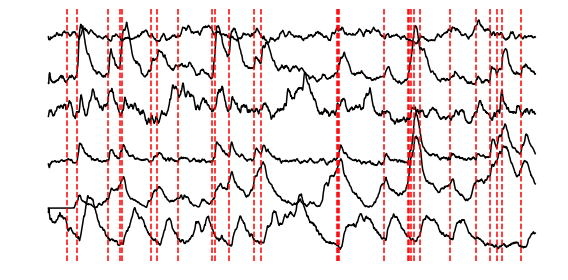

In [3]:
mousename = 'BV151'
mouse = dbMouse(mousename)
expt = mouse.imagingExperiments()[0]
labels = pd.read_excel('/data2/bert/CA3/Histology/RippleMice/' + mousename + '_subtypes.xlsx', \
                        sheet_name='group' + str(expt.rippleGrp))
imData = expt.imagingData(dFOverF='from_file', label='all_fissa')[:,:,0]
imaging_planes = ROI_planeID(expt, 'all_fissa')
ripple_frames = np.unique(loadRippleFrames(expt))

fig, ax = plt.subplots(1, 1, figsize = (8,4))
interval_start = 0
interval_end = 1900
cell = imData[0][interval_start:interval_end]
ax.plot(cell, color = 'black')

cell2 = imData[3][interval_start:interval_end]
ax.plot(cell2 + 0.5, color = 'black')

cell3 = imData[2][interval_start:interval_end]
ax.plot(cell3 + 1, color = 'black')

cell4 = imData[1][interval_start:interval_end]
ax.plot(cell4 + 1.5, color = 'black')

cell5 = imData[7][interval_start:interval_end]
ax.plot(cell5 + 2, color = 'black')

cell6 = imData[13][interval_start:interval_end]
ax.plot(cell6 + 2.5, color = 'black')

for rframe in ripple_frames:
    if (interval_start < rframe < interval_end):
        ax.axvline(rframe - 0, color = 'red', linestyle = '--')
        
simpleaxis(ax)
ax.axis('off')

fig.tight_layout()
plt.savefig('Example_Traces_around_SWRs.svg', format = 'svg', dpi = 1200, transparent = True)

In [ ]:
lfp_channel = 0
lfp_path = [fn for fn in locate('*.rhd', expt.LFPFilePath(), ignore=None)][0]
result = load_intan_rhd_format.read_data(lfp_path)
lfp_data = result['amplifier_data'][lfp_channel, :] #Raw LFP data
raw_time = result['t_amplifier']
offset = np.where(np.diff(result['board_dig_in_data'] > 0))[1][1]

frame_rate = 1/expt.frame_period()
n_imaging_frames = interval_end - interval_start
imaging_length = n_imaging_frames * (1/frame_rate)
lfp_frames = int(imaging_length * 20000)

data = lfp_data[offset:(offset + lfp_frames)]
data = butter_bandpass_filter(data, 150, 300)

filename = 'Filtered_LFP_Example_Session.pkl'
outfile = open(filename, 'wb')
pickle.dump(data, outfile)
outfile.close()

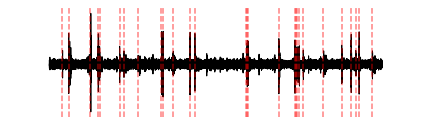

In [5]:
fig, ax = plt.subplots(1,1,figsize = (6,2))

ax.plot(data, color = 'black', linewidth = 1)
for rframe in ripple_frames:
    imaging_time = rframe * (1/frame_rate) 
    lfp_frame = imaging_time * 20000
    if (interval_start < rframe < interval_end):
        ax.axvline(lfp_frame, color = 'red', linestyle = '--', alpha = 0.5)

simpleaxis(ax)
ax.axis('off')        

fig.tight_layout()
plt.savefig('Aligned_Traces_and_LFP_around_SWRs_LFP_Only.svg', format = 'svg', dpi = 1200, \
            transparent = True)

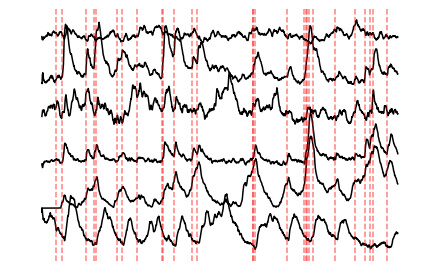

In [6]:
fig, ax = plt.subplots(1,1,figsize = (6,4))

ax.plot(cell, color = 'black')
ax.plot(cell2 + 0.5, color = 'black')
ax.plot(cell3 + 1, color = 'black')
ax.plot(cell4 + 1.5, color = 'black')
ax.plot(cell5 + 2, color = 'black')
ax.plot(cell6 + 2.5, color = 'black')#

for rframe in ripple_frames:
    if (interval_start < rframe < interval_end):
        ax.axvline(rframe, color = 'red', linestyle = '--', alpha = 0.5)

simpleaxis(ax)
ax.axis('off')

fig.tight_layout()
plt.savefig('Aligned_Traces_and_LFP_around_SWRs_Traces_Only.svg', format = 'svg', dpi = 1200, \
            transparent = True)